In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks",color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings(action="ignore")
# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

In [56]:
df=pd.read_csv('column_2C_weka.csv')
df.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [57]:
df.shape

(310, 7)

In [61]:
for col in df.columns:
    df.loc[df['class']=='Abnormal','class']=0
    df.loc[df['class']=='Normal','class']=1

In [62]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [63]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [65]:
df.skew()

pelvic_incidence            0.520440
pelvic_tilt numeric         0.676553
lumbar_lordosis_angle       0.599451
sacral_slope                0.792577
pelvic_radius              -0.176835
degree_spondylolisthesis    4.317954
class                       0.762768
dtype: float64

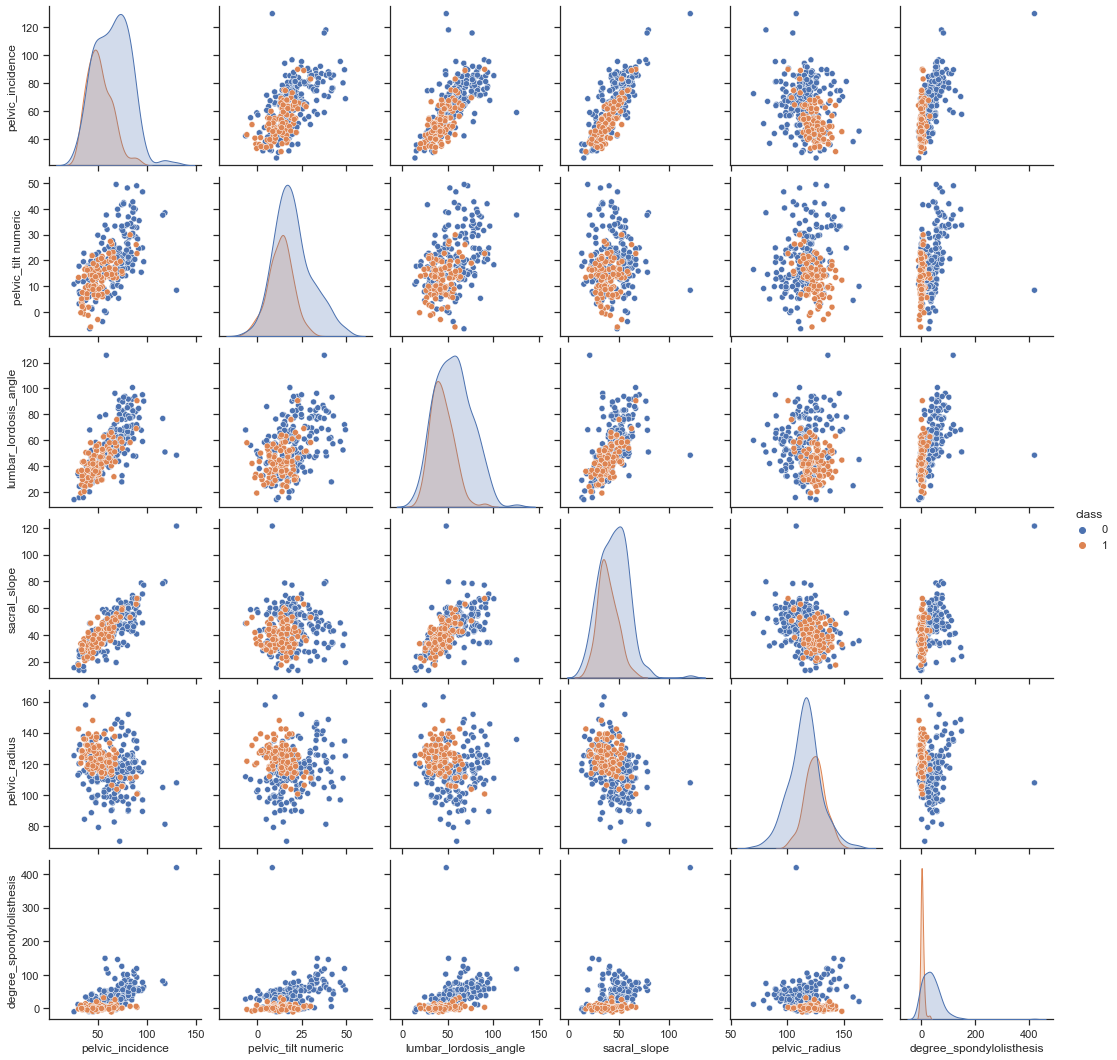

In [10]:
sns.pairplot(df,hue='class')

<AxesSubplot:>

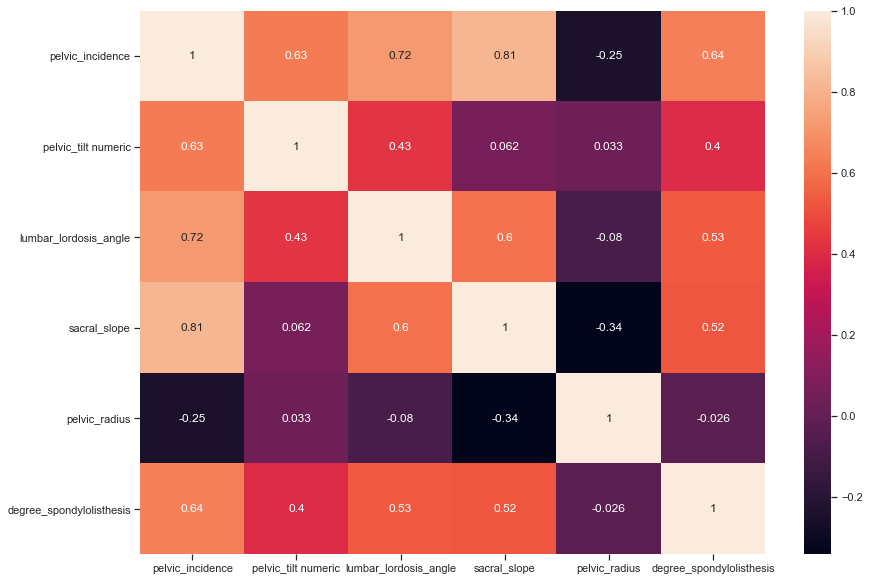

In [66]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

In [67]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [68]:
#pelvic_incidence - pelvic_tilt numeric
#pelvic_incidence-lumbar_lordosis_angle
#pelvic_incidence - sacral_slope
#pelvic_incidence - degree_spondylolisthesis


In [69]:
x=df.drop('class',axis=1)
y=df['class']

In [70]:
#scaling
from sklearn.preprocessing import StandardScaler,PowerTransformer
sc=StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(x),columns=x.columns)


In [71]:
#Kmeans
from sklearn.cluster import KMeans

wcss=[]
r=range(1,15)
for p in r:
    kmeans=KMeans(n_clusters=p)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
error=pd.DataFrame({'No':r,'Error':wcss})
error

,No,Error
0,1,1860.000000
1,2,1151.890555
2,3,929.709505
3,4,803.678366
4,5,706.709773
5,6,632.731300
6,7,576.024481
7,8,536.469489
8,9,508.293063
9,10,475.895707


Elbow Plot

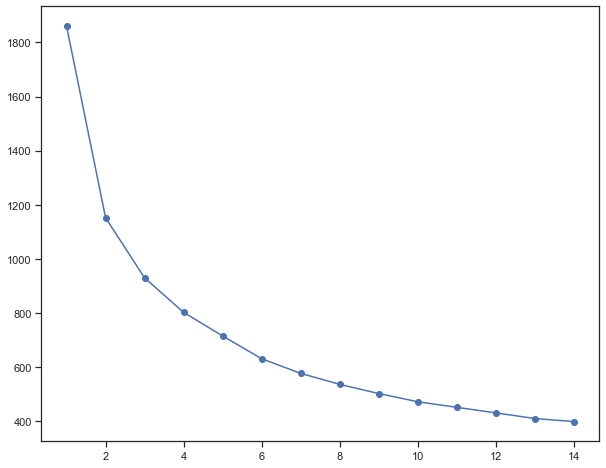

In [16]:
plt.figure(figsize=(10,8))
plt.plot(r,wcss,marker='o')

In [29]:
#optimal k=2 or k=3

In [73]:
from sklearn.metrics import silhouette_score
c=[2,3,4,5,6,7,8,9,10]

for p in c :
    cluster=KMeans(n_clusters=p)
    label=cluster.fit_predict(df_scaled)
    score=silhouette_score(df_scaled,label,random_state=10)
    print('The score of',p,'is',score)

The score of 2 is 0.36360050392785964
The score of 3 is 0.2938889120783734
The score of 4 is 0.2999216615317928
The score of 5 is 0.2692056375941393
The score of 6 is 0.237746251029367
The score of 7 is 0.2057201075121042
The score of 8 is 0.20445342419987084
The score of 9 is 0.19951868173159687
The score of 10 is 0.19273901321949222


In [76]:
kmeans=KMeans(n_clusters=2)
Label_k=kmeans.fit_predict(df_scaled)

In [77]:
Label_k

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [78]:
df_nw=df_scaled.copy()
df_nw['Label_K']=Label_k
df_nw.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Label_K
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,1
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,1
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,1


### Likage using ward

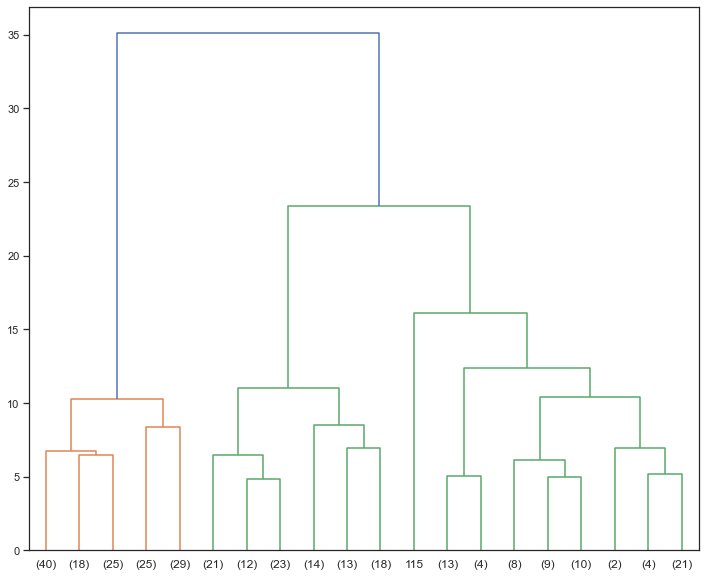

In [90]:
plt.figure(figsize=(12,10))
lin_w=linkage(df_scaled,method='ward')
dendrogram(lin_w,truncate_mode='lastp',p=20)
plt.show()

### Likage using complete

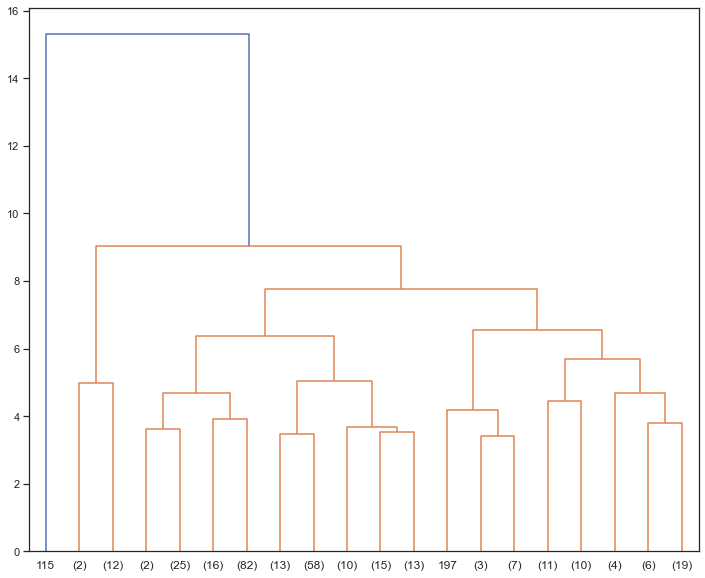

In [89]:
plt.figure(figsize=(12,10))
lin_c=linkage(df_scaled,method='complete')
dendrogram(lin_c,truncate_mode='lastp',p=20)
plt.show()

### Likage using single

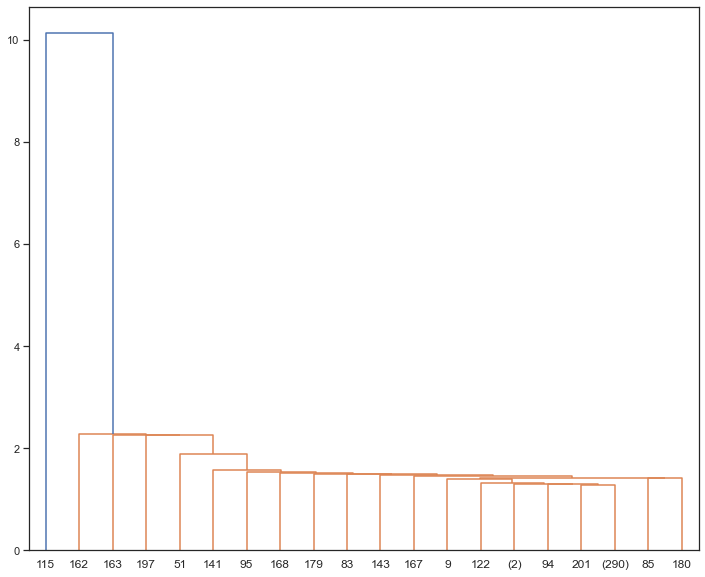

In [88]:
plt.figure(figsize=(12,10))
lin_s=linkage(df_scaled,method='single')
dendrogram(lin_s,truncate_mode='lastp',p=20)
plt.show()

### Likage using average

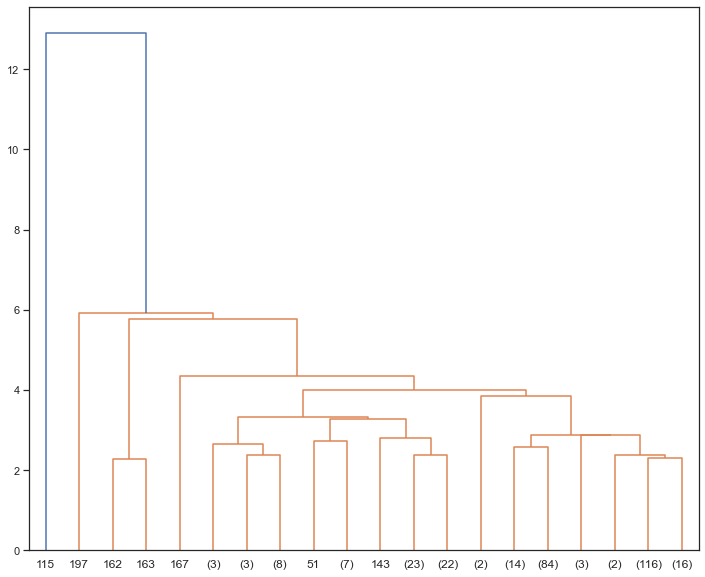

In [91]:
plt.figure(figsize=(12,10))
lin_avg=linkage(df_scaled,method='average')
dendrogram(lin_avg,truncate_mode='lastp',p=20)
plt.show()

finding the best cophenetic score for linkage method

In [94]:
from scipy.spatial.distance import pdist
link=['single','complete','average','ward']
for l in link:
    Z = linkage(df_scaled, method = l)
    c, coph_dist = cophenet(Z, pdist(df_scaled))
    print('Cophenetic value for ', l , 'is: ', c)
#as we ahve seen the Cophenetic score for avearge linkage method is high, 
#so we can consider for model building

Cophenetic value for  single is:  0.6733779824460394
Cophenetic value for  complete is:  0.7100770377450585
Cophenetic value for  average is:  0.8102695344031378
Cophenetic value for  ward is:  0.48007419081723585


In [95]:
c=[2,3,4,5,6,7,8]

for p in c :
    cluster=KMeans(n_clusters=p)
    label=cluster.fit_predict(df_scaled)
    score=silhouette_score(df_scaled,label,random_state=10)
    print('The score of',p,'is',score)

The score of 2 is 0.3629017847276513
The score of 3 is 0.2942357195625465
The score of 4 is 0.3009533193835893
The score of 5 is 0.2317656040737327
The score of 6 is 0.2448928846466865
The score of 7 is 0.20102394312524346
The score of 8 is 0.20401151202269607


## Agglomerative Clustering

Agglomerative clustering using ward

In [98]:
from sklearn.cluster import AgglomerativeClustering
hier= AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster2= hier.fit_predict(df_scaled)
cluster2

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
Agglomerative clustering using average

In [99]:
from sklearn.cluster import AgglomerativeClustering
hier= AgglomerativeClustering(n_clusters=2,linkage='average')
cluster3= hier.fit_predict(df_scaled)
cluster3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#according to plots and scores we will go with the word method to collect the label.

In [100]:
df_h=df_scaled.copy()
df_h["Label2"]=cluster2
df_h.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Label2
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,1
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,1


In [101]:
df['class'].value_counts()/len(df)*100

0    67.741935
1    32.258065
Name: class, dtype: float64

In [109]:
df_nw['Label_K'].value_counts()/len(df)*100

1    59.354839
0    40.645161
Name: Label_K, dtype: float64

In [110]:
df_h['Label2'].value_counts()/len(df)*100

0    55.806452
1    44.193548
Name: Label2, dtype: float64

#### Let's Visualize using the plots

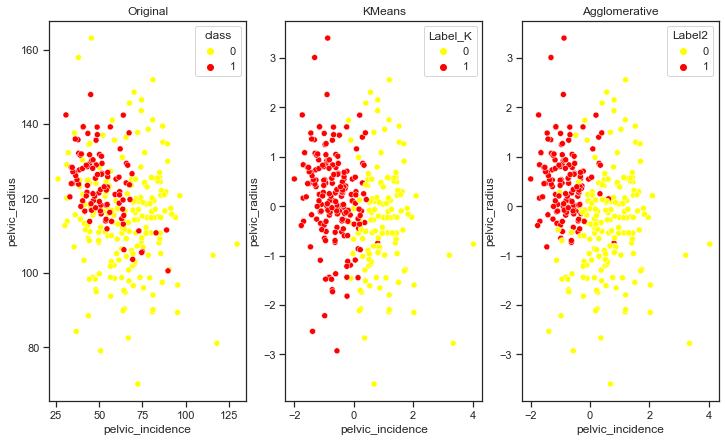

In [115]:
plt.rcParams['figure.figsize'] = (12,7)

plt.subplot(1,3,1)
plt.title('Original')
sns.scatterplot(x='pelvic_incidence',y='pelvic_radius',hue='class',data=df,palette=['yellow','red'])

plt.subplot(1,3,2)
plt.title('KMeans')
sns.scatterplot(x='pelvic_incidence',y='pelvic_radius',hue='Label_K',data=df_nw,palette=['yellow','red'])

plt.subplot(1,3,3)
plt.title('Agglomerative')
sns.scatterplot(x='pelvic_incidence',y='pelvic_radius',hue='Label2',data=df_h,palette=['yellow','red'])
plt.show()

In [ ]:
#according to the plots we can see the datapoints are overlaping in all the clusters where
#the agglomerative cluster is much better

## SLC MODEL BUILDNG

In [116]:
x = df_h.drop('Label2',axis=1)
y = df_h.Label2
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [118]:
dt = DecisionTreeClassifier()
model_agg = dt.fit(x_train,y_train)
ypred_h_agg = model_agg.predict(x_test)
print('accuracy_score : ',accuracy_score(y_test,ypred_h_agg))
print('classification_report :')
print(classification_report(y_test,ypred_h_agg))

accuracy_score :  0.9354838709677419
classification_report :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.92      0.92      0.92        25

    accuracy                           0.94        62
   macro avg       0.93      0.93      0.93        62
weighted avg       0.94      0.94      0.94        62



In [119]:
ypred_train_agg = model_agg.predict(x_train)
print('accuracy_score of the model is ',accuracy_score(y_train,ypred_train_agg))


accuracy_score of the model is  1.0


In [ ]:
#train accuracy is 100 and test accuracy is 94%, which is quite good

## Random Forest

In [120]:
rf = RandomForestClassifier()
model_rf = rf.fit(x_train,y_train)
ypred_h_rf = model_rf.predict(x_test)
print('accuracy_score : ',accuracy_score(y_test,ypred_h_rf))
print('classification_report :')
print(classification_report(y_test,ypred_h_rf))

accuracy_score :  0.967741935483871
classification_report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.92      0.96        25

    accuracy                           0.97        62
   macro avg       0.97      0.96      0.97        62
weighted avg       0.97      0.97      0.97        62



In [121]:
ypred_train_rf = model_rf.predict(x_train)
print('accuracy_score of the model is ',accuracy_score(y_train,ypred_train_rf))


accuracy_score of the model is  1.0


In [ ]:
#test accuracy is 97%,and train accuracy is 100 which is even better compared to decision Tree

## GradientBoostingClassifier

In [123]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [124]:
gb = GradientBoostingClassifier(n_estimators=50)
model_gb = gb.fit(x_train,y_train)
ypred_h_gb = model_gb.predict(x_test)
print('accuracy_score : ',accuracy_score(y_test,ypred_h_gb))
print('classification_report:')
print(classification_report(y_test,ypred_h_gb))

accuracy_score :  1.0
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        25

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [125]:
ypred_train_gb = model_gb.predict(x_train)
print('accuracy_score :',accuracy_score(y_train,ypred_train_gb))

accuracy_score : 1.0


## AdaBoostClassifier

In [126]:
ada = AdaBoostClassifier(n_estimators=50)
model_ada = ada.fit(x_train,y_train)
ypred_h_ada = model_ada.predict(x_test)
print('accuracy_score : ',accuracy_score(y_test,ypred_h_ada))
print('classification_report :')
print(classification_report(y_test,ypred_h_ada))

accuracy_score :  0.9838709677419355
classification_report :
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.96      0.98        25

    accuracy                           0.98        62
   macro avg       0.99      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62



In [127]:
ypred_train_ada = model_ada.predict(x_train)
print('accuracy_score of the model is ',accuracy_score(y_train,ypred_train_ada))

accuracy_score of the model is  1.0


In [ ]:
#after seeing adaboost and gradientboost and also random classifier and dicision we can see gradientboost is the best for our model.